In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the dataset(replace 'your_dataset.csv' with the actual file name)
try:
    df = pd.read_csv('C:\\Users\\Sindu\\Desktop\\Assignment ExcelR\\Basic stats - 1\\Basic stats - 1\\sales_data_with_discounts.csv')  
except FileNotFoundError:
    print("Error: 'your_dataset.csv' not found. Please provide the correct file path.")
    exit()  # Exit the script if the file is not found

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())


First few rows of the dataset:
         Date       Day  SKU City  Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C      15  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C      10  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C       7  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C       6  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C       3  Mobiles   YouM      YM-98    

   Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      12100             181500          11.654820     21153.498820   
1      10100             101000          11.560498     11676.102961   
2      16100             112700           9.456886     10657.910157   
3      20100             120600           6.935385      8364.074702   
4       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298 

In [3]:
# --- Descriptive Analytics for Numerical Columns ---
print("\n--- Descriptive Analytics for Numerical Columns ---")
numerical_cols = df.select_dtypes(include=np.number).columns  # Select numerical columns

if numerical_cols.empty:
    print("No numerical columns found in the dataset.")
else:
    descriptive_stats = df[numerical_cols].describe()
    print(descriptive_stats)

    # Calculate and display additional statistics (mean, median, mode, std)
    for col in numerical_cols:
        mean = df[col].mean()
        median = df[col].median()
        mode = df[col].mode().values[0]  # Handle potential multiple modes
        std = df[col].std()
        print(f"\nStatistics for column '{col}':")
        print(f"  Mean: {mean}")
        print(f"  Median: {median}")
        print(f"  Mode: {mode}")
        print(f"  Standard Deviation: {std}")



--- Descriptive Analytics for Numerical Columns ---
           Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  450.000000    450.000000         450.000000         450.000000   
mean     5.066667  10453.433333       33812.835556          15.155242   
std      4.231602  18079.904840       50535.074173           4.220602   
min      1.000000    290.000000         400.000000           5.007822   
25%      3.000000    465.000000        2700.000000          13.965063   
50%      4.000000   1450.000000        5700.000000          16.577766   
75%      6.000000  10100.000000       53200.000000          18.114718   
max     31.000000  60100.000000      196400.000000          19.992407   

       Discount Amount  Net Sales Value  
count       450.000000       450.000000  
mean       3346.499424     30466.336131  
std        4509.902963     46358.656624  
min          69.177942       326.974801  
25%         460.459304      2202.208645  
50%         988.933733      4677.7880


--- Data Visualization ---


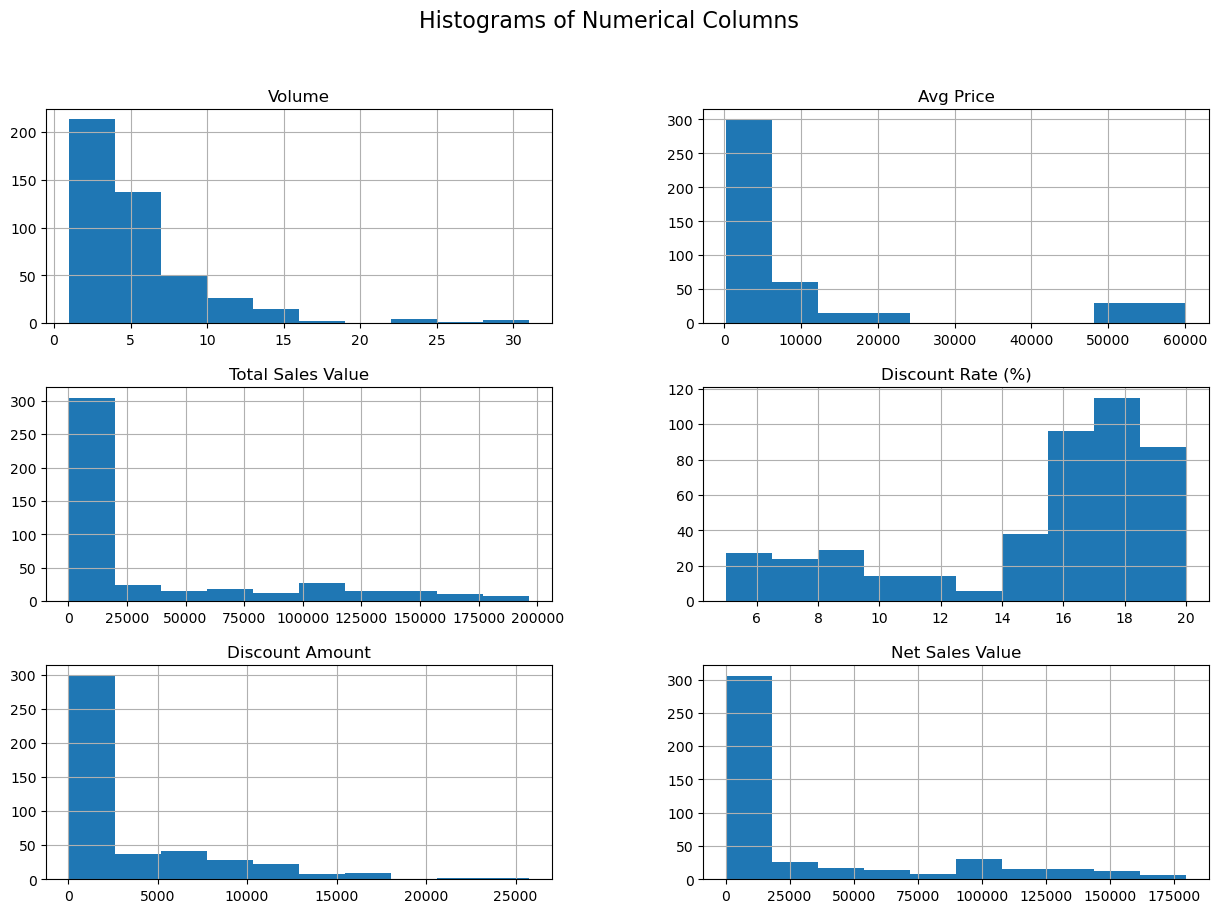

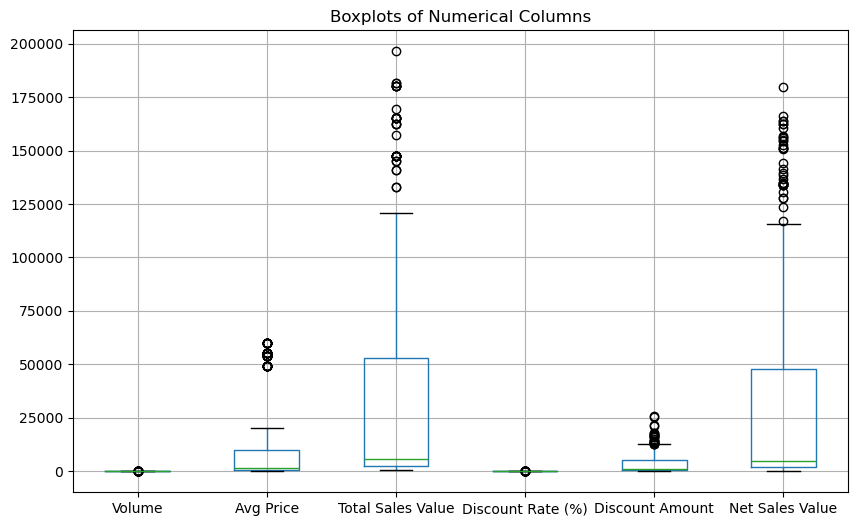

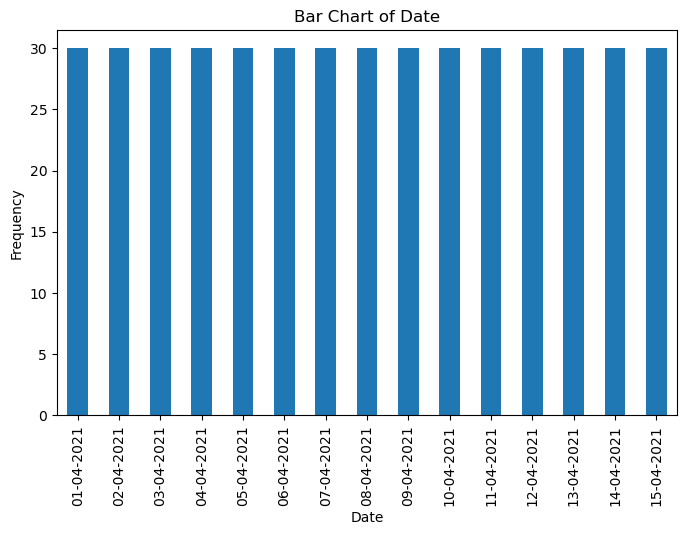

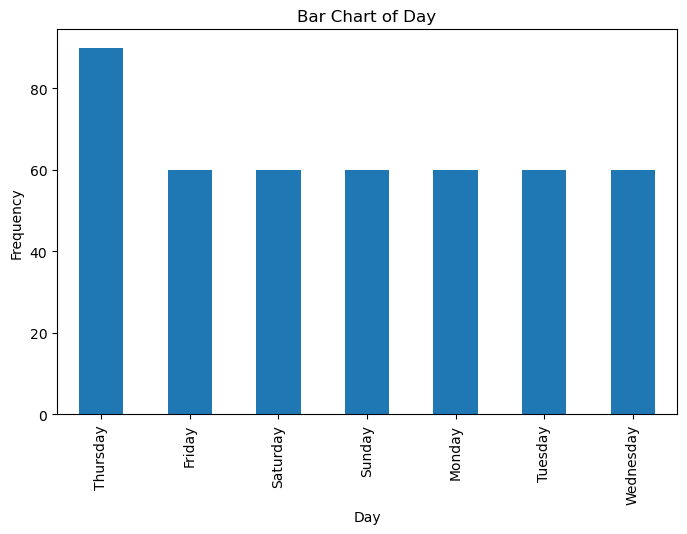

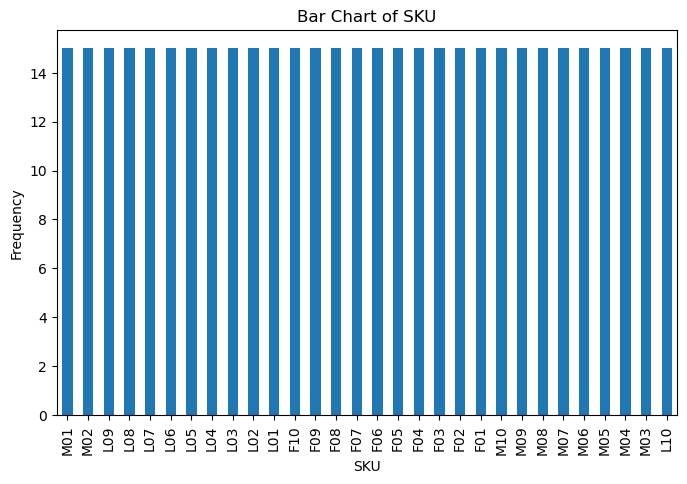

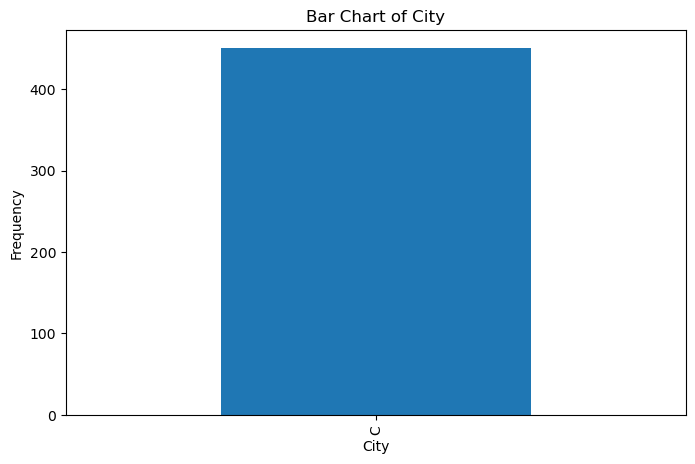

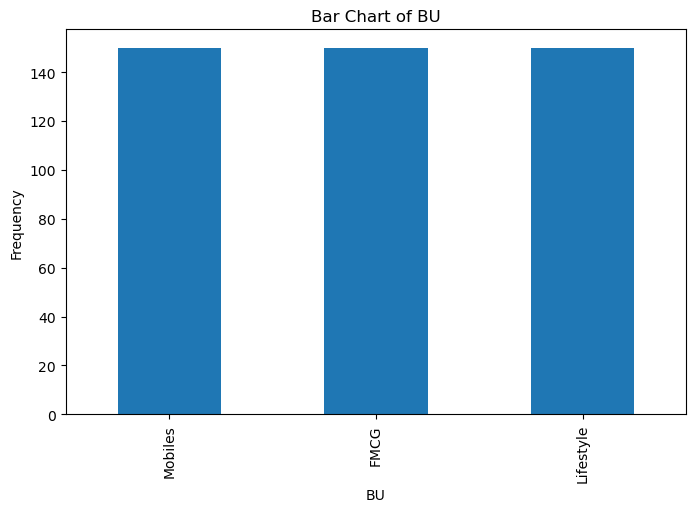

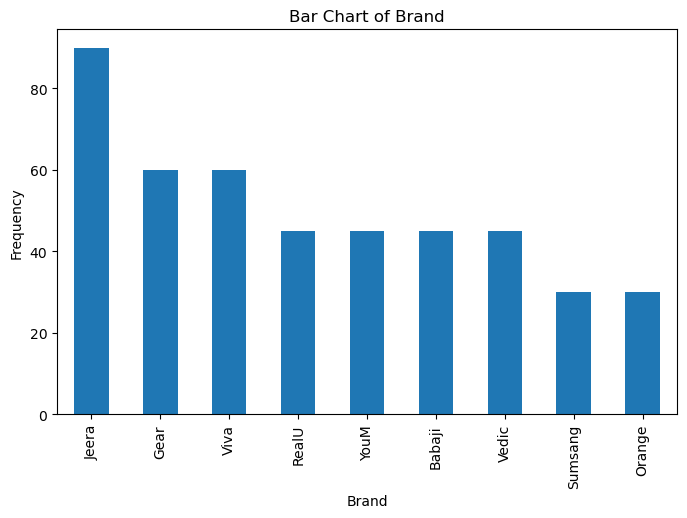

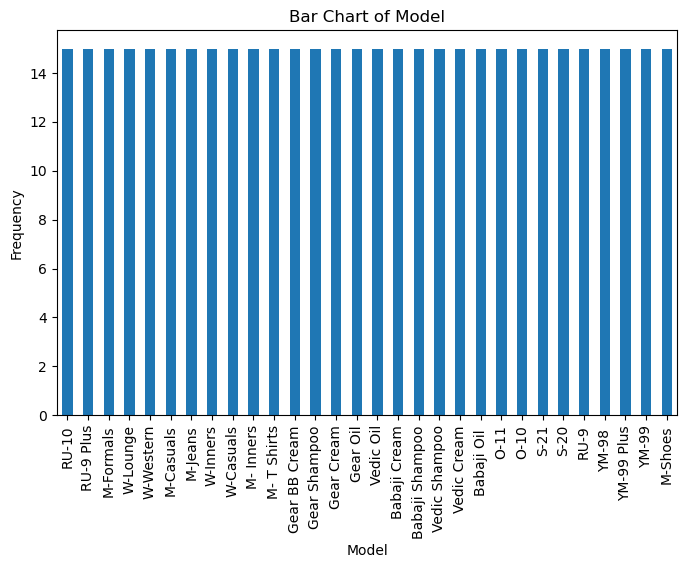

In [11]:
# --- Data Visualization ---
print("\n--- Data Visualization ---")

# Histograms
if not numerical_cols.empty:
    df[numerical_cols].hist(figsize=(15, 10))  # Adjust figure size as needed
    plt.suptitle("Histograms of Numerical Columns", fontsize=16)
    plt.show()

# Boxplots
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    df.boxplot(column=list(numerical_cols)) # Boxplot for all numerical columns.
    plt.title("Boxplots of Numerical Columns")
    plt.show()


# Bar Chart Analysis for Categorical Columns
categorical_cols = df.select_dtypes(exclude=np.number).columns
if not categorical_cols.empty:
    for col in categorical_cols:
        plt.figure(figsize=(8, 5))  # Adjust figure size as needed
        df[col].value_counts().plot(kind='bar')
        plt.title(f"Bar Chart of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()
else:
    print("No categorical columns found.")


In [13]:
# --- Standardization of Numerical Variables ---
print("\n--- Standardization of Numerical Variables ---")
if not numerical_cols.empty:
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    print("Standardized Data (first 5 rows):")
    print(df[numerical_cols].head())



--- Standardization of Numerical Variables ---
Standardized Data (first 5 rows):
     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146           1.719276          -1.949723         1.113807   
4 -0.488932  -0.130313          -0.188452           0.673739         0.227852   

   Net Sales Value  
0         2.804756  
1         1.271026  
2         1.545675  
3         1.765810  
4        -0.227595  


In [15]:
# --- Conversion of Categorical Data into Dummy Variables ---
print("\n--- Conversion of Categorical Data into Dummy Variables ---")
if not categorical_cols.empty:
    df = pd.get_dummies(df, columns=list(categorical_cols), drop_first=True) #drop_first avoids multicollinearity
    print("Dataset after One-Hot Encoding (first 5 rows):")
    print(df.head())



--- Conversion of Categorical Data into Dummy Variables ---
Dataset after One-Hot Encoding (first 5 rows):
     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146           1.719276          -1.949723         1.113807   
4 -0.488932  -0.130313          -0.188452           0.673739         0.227852   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0         2.804756            False            False            False   
1         1.271026            False            False            False   
2         1.545675            False            False            False   
3         1.765810            False            False            False   
4        -0.227595            False     

In [17]:
# --- Conclusion ---
print("\n--- Conclusion ---")
print("Descriptive analytics provided insights into the central tendency and spread of numerical variables.")
print("Data visualization helped understand the distributions and relationships within the data.")
print("Standardization and one-hot encoding are crucial preprocessing steps for many machine learning algorithms.")
print("These steps ensure that the data is in a suitable format for modeling and can improve model performance.")



--- Conclusion ---
Descriptive analytics provided insights into the central tendency and spread of numerical variables.
Data visualization helped understand the distributions and relationships within the data.
Standardization and one-hot encoding are crucial preprocessing steps for many machine learning algorithms.
These steps ensure that the data is in a suitable format for modeling and can improve model performance.
